# Random and Mixed Effects Models

## 1.1 Random Effects Models

### 1.1.1 One-Way ANOVA

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline
#pip install "plotnine==0.6.0" tu use ggplot in python

In [2]:
weight = [61, 100,  56, 113,  99, 103,  75,  62,  ## sire 1
            75, 102,  95, 103,  98, 115,  98,  94,  ## sire 2
            58,  60,  60,  57,  57,  59,  54, 100,  ## sire 3
            57,  56,  67,  59,  58, 121, 101, 101,  ## sire 4
            59,  46, 120, 115, 115,  93, 105,  75 ] ## sire 5
sire=np.array([1,2,3,4,5])
sire=np.repeat(sire,8, axis=0)
animals = {'weight': weight, 'sire': pd.Categorical(sire)}
animals = pd.DataFrame(data=animals)
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   weight  40 non-null     int64   
 1   sire    40 non-null     category
dtypes: category(1), int64(1)
memory usage: 688.0 bytes


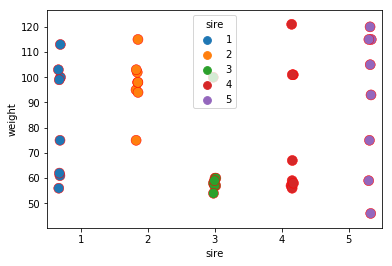

In [3]:
sb.stripplot(x="sire", y="weight" ,data=animals, size=10, edgecolor='red', linewidth=0.5, ax=None, dodge=True, hue="sire")

At first sight it looks like the variation between different sires is rather small

In [4]:
md = smf.mixedlm("weight ~(1-sire)", animals, groups="sire" )
mdf = md.fit()
mdf.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: weight   
No. Observations: 40      Method:             REML     
No. Groups:       5       Scale:              463.7928 
Min. group size:  8       Log-Likelihood:     -179.1085
Max. group size:  8       Converged:          Yes      
Mean group size:  8.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    82.550    5.911 13.965 0.000 70.964 94.136
sire Var    116.750    6.056                           
=======================================================

"""

alpha_hat = 463.7929
variance sire =116.750
intercept = 82.550

In [5]:
mdf.conf_int(alpha=0.025)

,0,1
Intercept,69.300154,95.799846
sire Var,-0.378549,0.882005


setting the contrast of the data

In [6]:
from patsy.contrasts import Sum
levels = [1,2,3,4,5]
contrast = Sum().code_without_intercept(levels)

In [7]:
aov = ols('weight ~ C(sire, Sum)',data=animals).fit()
table = sm.stats.anova_lm(aov, typ=2) # Type 2 ANOVA DataFrame
print(table)

                sum_sq    df         F    PR(>F)
C(sire, Sum)   5591.15   4.0  3.013819  0.030874
Residual      16232.75  35.0       NaN       NaN


In [8]:
aov.conf_int(alpha=0.05)

,0,1
Intercept,75.637245,89.462755
"C(sire, Sum)[S.1]",-12.750510,14.900510
"C(sire, Sum)[S.2]",1.124490,28.775510
"C(sire, Sum)[S.3]",-33.250510,-5.599490
"C(sire, Sum)[S.4]",-18.875510,8.775510


In [9]:
randomeffect=mdf.random_effects
randomeffect

{1: sire    0.71831
 dtype: float64, 2: sire    9.989525
 dtype: float64, 3: sire   -12.9797
 dtype: float64, 4: sire   -3.374388
 dtype: float64, 5: sire    5.646253
 dtype: float64}

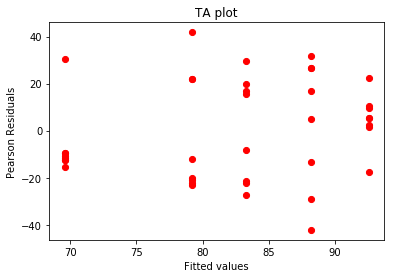

In [10]:
x=np.array(mdf.fittedvalues)
y=np.array(mdf.resid)
#fig, ax = plt.subplots()
plt.scatter(x, y,s = 150, c = 'red', marker = '.')
plt.title('TA plot')
plt.ylabel('Pearson Residuals')
plt.xlabel('Fitted values')
plt.show()

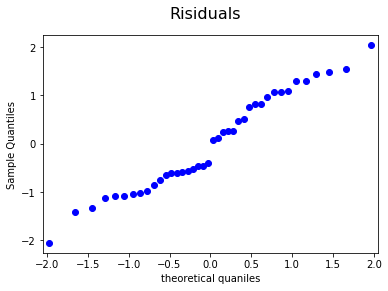

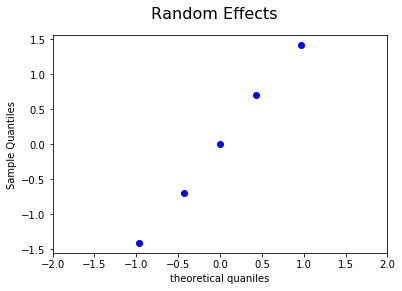

In [11]:
Y_hat=np.random.normal(0,1,40)
Y_hat2=np.random.normal(0,1,5)
pp_x2=sm.ProbPlot(np.array([1,2,3,4,5]), fit=True)
pp_y2=sm.ProbPlot(Y_hat2, fit=True)
pp_x = sm.ProbPlot(y, fit=True)
pp_y = sm.ProbPlot(Y_hat, fit=True)
fig1= pp_x.qqplot(pp_y)
fig1.suptitle('Risiduals', fontsize=16)
fig1=plt.xlabel('theoretical quaniles')
fig2=pp_x2.qqplot(pp_y2)
fig2.suptitle('Random Effects', fontsize=16)
fig2=plt.xlabel('theoretical quaniles')
plt.xlim(-2, 2)
plt.show()

### 1.1.2 More Than One Factor

In [12]:
y = [142.3, 144.0, 148.6, 146.9, 142.9, 147.4, 133.8, 133.2, 
       134.9, 146.3, 145.2, 146.3, 125.9, 127.6, 108.9, 107.5,
       148.6, 156.5, 148.6, 153.1, 135.5, 138.9, 132.1, 149.7, 
       152.0, 151.4, 149.7, 152.0, 142.9, 142.3, 141.7, 141.2] 
fac=np.array([1,2,3,4])
day=np.repeat(fac,8, axis=0)
machine=np.concatenate((np.repeat(fac,2, axis=0), np.repeat(fac,2, axis=0),np.repeat(fac,2, axis=0),np.repeat(fac,2, axis=0)))
trigly = {'y': y , 'day': pd.Categorical(day), 'machine': pd.Categorical(machine)}
trigly = pd.DataFrame(data=trigly)
trigly.info()
print(pd.Categorical(day).categories)
print(pd.Categorical(machine).categories)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   y        32 non-null     float64 
 1   day      32 non-null     category
 2   machine  32 non-null     category
dtypes: category(2), float64(1)
memory usage: 832.0 bytes
Int64Index([1, 2, 3, 4], dtype='int64')
Int64Index([1, 2, 3, 4], dtype='int64')


In [13]:
pd.crosstab(day, machine,rownames=['day'],colnames=['machine'])

machine,1,2,3,4
day,,,,
1,2,2,2,2
2,2,2,2,2
3,2,2,2,2
4,2,2,2,2


C:\Users\Rudolf\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Rudolf\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Rudolf\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


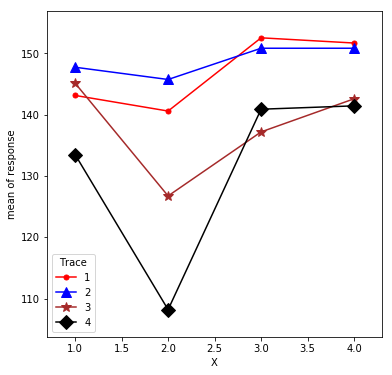

In [14]:
from statsmodels.graphics.factorplots import interaction_plot
fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(x=day, trace=machine, response=y,colors=['red', 'blue','brown','black'], markers=['.', '^','*','D'], ms=10, ax=ax)

In [15]:
md2 = smf.mixedlm("y ~  (1-day)+(1-machine) + (1-day*machine) ", trigly, groups=machine)
mdf2 = md2.fit()
print(mdf2.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: y        
No. Observations: 32      Method:             REML     
No. Groups:       4       Scale:              85.9580  
Min. group size:  8       Log-Likelihood:     -117.5364
Max. group size:  8       Converged:          Yes      
Mean group size:  8.0                                  
-------------------------------------------------------
           Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
-------------------------------------------------------
Intercept 141.184    4.142 34.083 0.000 133.066 149.303
Group Var  57.892    6.360                             



In [16]:
print(mdf2.tvalues)

Intercept    34.083152
Group Var     0.981764
dtype: float64


### 1.1.3 Nesting

In [17]:
Pastes=pd.read_csv('Pastes.csv',sep=" ") 
Pastes.head()

,strength,batch,cask,sample
1,62.8,A,a,A:a
2,62.6,A,a,A:a
3,60.1,A,b,A:b
4,62.3,A,b,A:b
5,62.7,A,c,A:c


In [18]:
Pastes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1 to 60
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   strength  60 non-null     float64
 1   batch     60 non-null     object 
 2   cask      60 non-null     object 
 3   sample    60 non-null     object 
dtypes: float64(1), object(3)
memory usage: 2.3+ KB


In [19]:
from pandas.api.types import CategoricalDtype
cask=Pastes["cask"]
batch=Pastes["batch"]
strength=Pastes["strength"]

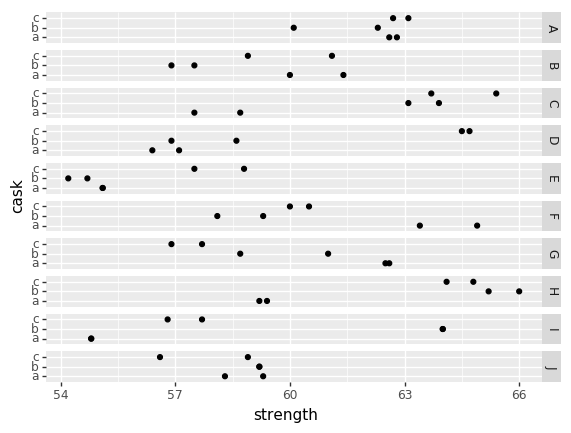

<ggplot: (-9223371948270627447)>

In [20]:
(ggplot(Pastes)+ aes(x='strength', y='cask')+ geom_point()+ labs( x='strength', y='cask')+ facet_grid('batch~'))

fit.paste <- lmer(strength ~ (1 | batch/cask), data = Pastes)
summary(fit.paste)

In [21]:
md3= smf.mixedlm("strength ~ (batch-cask)", Pastes, groups="cask" )
mdf3 = md3.fit()
mdf3.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: strength 
No. Observations: 60      Method:             REML     
No. Groups:       3       Scale:              7.3060   
Min. group size:  20      Log-Likelihood:     -129.9646
Max. group size:  20      Converged:          Yes      
Mean group size:  20.0                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    62.267    1.126 55.313 0.000 60.060 64.473
batch[T.B]   -2.967    1.561 -1.901 0.057 -6.025  0.092
batch[T.C]   -0.217    1.561 -0.139 0.890 -3.275  2.842
batch[T.D]   -2.567    1.561 -1.645 0.100 -5.625  0.492
batch[T.E]   -6.367    1.561 -4.080 0.000 -9.425 -3.308
batch[T.F]   -1.233    1.561 -0.790 0.429 -4.292  1.825
batch[T.G]   -2.367    1.561 -1.517 0.129 -5.425  0.692
batch[T.H]    0.850    1.561  0.545 0.586 -2.209  3.909
batch[T.I]   -3.583    1.561 -2.296 0.022 -6.642 -0.525
batch[T.J]   -3.683    1.561 -2.360 0.018 -6.742 -0.625
cask Var      0.149    0.194                           
=======================================================

"""

In [22]:
Machines=pd.read_csv('Machines.csv', sep = "\t") 
Machines.head()

,Worker,Machine,score
0,1,A,52.0
1,1,A,52.8
2,1,A,53.1
3,2,A,51.8
4,2,A,52.8


In [23]:
Machines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Worker   54 non-null     int64  
 1   Machine  54 non-null     object 
 2   score    54 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.4+ KB


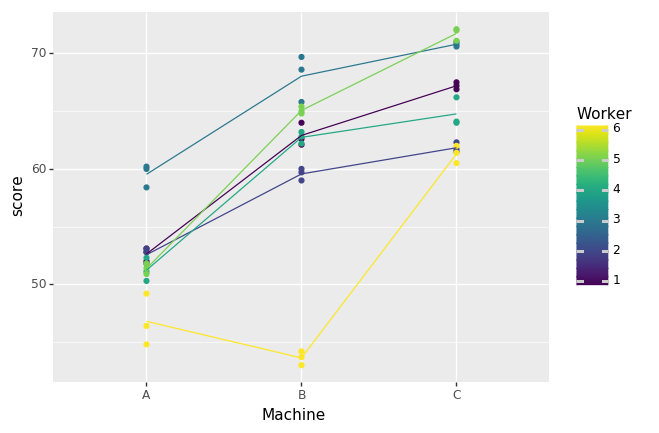

<ggplot: (88584453384)>

In [24]:
(ggplot(Machines)+ aes(x='Machine', y='score', group = 'Worker', color = 'Worker') + geom_point() + stat_summary(fun_y = np.mean, geom='line'))

C:\Users\Rudolf\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Rudolf\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Rudolf\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


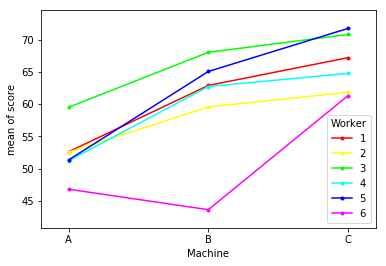

In [25]:
fig = interaction_plot(x = Machines['Machine'], trace = Machines['Worker'], response = Machines['score'])

In [26]:
machinereg = smf.mixedlm("score ~ Machine", 
                         Machines, groups = Machines["Machine"],
                        re_formula = "~Worker")

In [27]:
from patsy.contrasts import Treatment
levels2 = [1,2,3]
contrast2 = Treatment().code_without_intercept(levels)
machinereg = smf.mixedlm("score ~ Machine", 
                         Machines, groups = Machines["Machine"],
                        re_formula = "~Worker")

In [29]:
formula = 'score ~ Machine + C(Worker)'
lm = ols(formula, Machines).fit()
